In [9]:
import pandas as pd

# Load your cleaned tweet data from the database (replace this with your actual data loading code)
cleaned_tweet_data = pd.read_csv("justdoit_tweets_2018_09_07_2.csv")

# Get the number of rows and columns
num_rows, num_columns = cleaned_tweet_data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 5089
Number of columns: 72


In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


nltk.download('stopwords')
nltk.download('punkt')

# Load your tweet data from the database (replace this with your actual data loading code)
tweet_data = pd.read_csv("justdoit_tweets_2018_09_07_2.csv")

def preprocess_tweet(tweet_text):
    # Convert to lowercase
    tweet_text = tweet_text.lower()
    
    # Remove special characters, links, and hashtags
    tweet_text = re.sub(r'[^\w\s]', '', tweet_text)
    tweet_text = re.sub(r'http\S+', '', tweet_text)
    tweet_text = re.sub(r'#\w+', '', tweet_text)
    
    # Tokenize the text using TweetTokenizer
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    words = tokenizer.tokenize(tweet_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Perform stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

# Process each tweet in the database
cleaned_tweets = []

for index, row in tweet_data.iterrows():
    original_tweet = row["tweet_full_text"]
    cleaned_tweet = preprocess_tweet(original_tweet)
    cleaned_tweets.append(cleaned_tweet)

# Save the cleaned tweets to a new file or update your database (replace this with your data saving code)
cleaned_tweets_df = pd.DataFrame({"cleaned_tweet": cleaned_tweets})
cleaned_tweets_df.to_csv("cleaned_tweet_database.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaoquanyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaoquanyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Process each tweet in the database
# cleaned_tweets = []

# for index, row in tweet_data.iterrows():
#     original_tweet = row["tweet_full_text"]
#     cleaned_tweet = preprocess_tweet(original_tweet)
#     cleaned_tweets.append(cleaned_tweet)
    
#     # Output the original and cleaned tweet for comparison
#     print("Original tweet:", original_tweet)
#     print("Cleaned tweet:", cleaned_tweet)
#     print("--------------------------")

# # Save the cleaned tweets to a new file or update your database (replace this with your data saving code)
# cleaned_tweets_df = pd.DataFrame({"cleaned_tweet": cleaned_tweets})
# cleaned_tweets_df.to_csv("cleaned_tweet_database.csv", index=False)


In [4]:

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaoquanyang/nltk_data...


True

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer


# Load your cleaned tweet data from the database (replace this with your actual data loading code)
cleaned_tweet_data = pd.read_csv("cleaned_tweet_database.csv")

# Create a Sentiment Intensity Analyzer object
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each cleaned tweet
for index, row in cleaned_tweet_data.iterrows():
    cleaned_tweet = row["cleaned_tweet"]
    sentiment_scores = sia.polarity_scores(cleaned_tweet)

    # Determine sentiment based on compound score
    if sentiment_scores['compound'] > 0.05:
        sentiment = "Positive"
    elif sentiment_scores['compound'] < -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    print("Cleaned Tweet:", cleaned_tweet)
    print("Sentiment:", sentiment)
    print("Sentiment Scores:", sentiment_scores)
    print("--------------------------")


Cleaned Tweet: done better perfect sheryl sandberg quot motiv justdoit
Sentiment: Positive
Sentiment Scores: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.765}
--------------------------
Cleaned Tweet: shout great fire depart tour much love nyc hero fdni likesforlik promo music instagood instadaili postoftheday bestoftheday justdoit nike picoftheday
Sentiment: Positive
Sentiment Scores: {'neg': 0.079, 'neu': 0.528, 'pos': 0.393, 'compound': 0.8885}
--------------------------
Cleaned Tweet: amazingli hilari nike ad meme happen newsfe sooo decid get littl creativ justdoit 4yourmorn 4yourmemecollect
Sentiment: Neutral
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------------
Cleaned Tweet: kapernickeffect swoosh justdoit luca bishop cigar loung
Sentiment: Neutral
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------------
Cleaned Tweet: one hand one dream shaquem griffin stori shaquem nfl seattl seaha

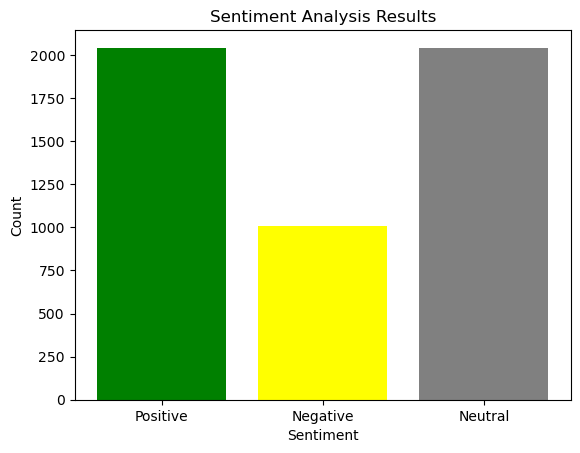

In [16]:
import matplotlib.pyplot as plt


# Load your cleaned tweet data from the database (replace this with your actual data loading code)
cleaned_tweet_data = pd.read_csv("cleaned_tweet_database.csv")

# Create a Sentiment Intensity Analyzer object
sia = SentimentIntensityAnalyzer()

# Initialize counters for sentiment categories
positive_count = 0
negative_count = 0
neutral_count = 0

# Perform sentiment analysis for each cleaned tweet and count sentiments
for index, row in cleaned_tweet_data.iterrows():
    cleaned_tweet = row["cleaned_tweet"]
    sentiment_scores = sia.polarity_scores(cleaned_tweet)

    if sentiment_scores['compound'] > 0.05:
        positive_count += 1
    elif sentiment_scores['compound'] < -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Data for creating the bar plot
sentiment_data = [
    {"Sentiment": "Positive", "Count": positive_count},
    {"Sentiment": "Negative", "Count": negative_count},
    {"Sentiment": "Neutral", "Count": neutral_count}
]

# Convert sentiment data to a DataFrame

sentiment_df = pd.DataFrame(sentiment_data)

# Create a bar plot
plt.bar(sentiment_df["Sentiment"], sentiment_df["Count"], color=['green', 'yellow', 'grey'])

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Results")

# Show the plot
plt.show()


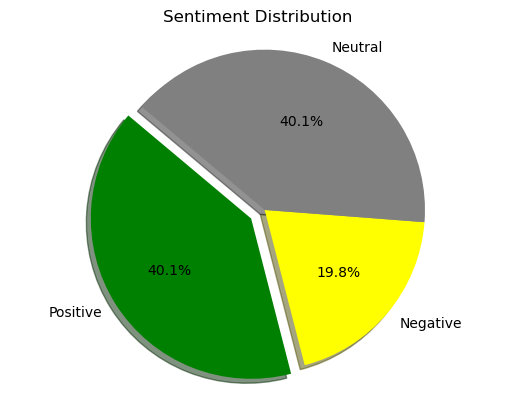

In [15]:
# Calculate total number of tweets
total_tweets = positive_count + negative_count + neutral_count

# Calculate percentages for each sentiment category
positive_percentage = (positive_count / total_tweets) * 100
negative_percentage = (negative_count / total_tweets) * 100
neutral_percentage = (neutral_count / total_tweets) * 100

# Data for creating the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'yellow', 'grey']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add title
plt.title("Sentiment Distribution")

# Show the plot
plt.show()